<a href="https://colab.research.google.com/github/jose-izv/scrapyFaces/blob/main/scrapy_faces_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación del proyecto

In [ ]:
# instalación de Scrapy
!pip install Scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 5.0 MB/s 
     |████████████████████████████████| 3.1 MB 35.7 MB/s 
     |████████████████████████████████| 4.0 MB 30.0 MB/s 
     |████████████████████████████████| 57 kB 3.4 MB/s 
     |████████████████████████████████| 261 kB 42.0 MB/s 
     |████████████████████████████████| 93 kB 1.9 MB/s 
     |████████████████████████████████| 74 kB 2.3 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11959 sha256=38e305ba1f3e97dacb6e3199614aaae47699db14a7b0a1d87b1d4edf0457ac2e
  Stored in directory: /root/.cache/pip/wheels/dc/b9/4a/948b1176e084b9e3f85e4ffc3d08f817b1fdf0d973bbb94f81
Successfully built PyDispatcher


In [ ]:
# creación del proyecto
!scrapy startproject project_faces scrapy

New Scrapy project 'project_faces', using template directory '/usr/local/lib/python3.8/dist-packages/scrapy/templates/project', created in:
    /content/scrapy

You can start your first spider with:
    cd scrapy
    scrapy genspider example example.com


In [ ]:
# creación del spider
!cd scrapy/project_faces && scrapy genspider FindFaces https://www.tinosoriano.com/blog/

Created spider 'FindFaces' using template 'basic' in module:
  project_faces.spiders.FindFaces


## Edición de path/to/settings.py



*   USER_AGENT
*   ROBOTSTXT_OBEY
*   DEFAULT_REQUEST_HEADERS



In [ ]:
%%writefile scrapy/project_faces/settings.py

BOT_NAME = 'project_faces'

SPIDER_MODULES = ['project_faces.spiders']
NEWSPIDER_MODULE = 'project_faces.spiders'

USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'

ROBOTSTXT_OBEY = False

DEFAULT_REQUEST_HEADERS = {
   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
   'Accept-Language': 'es',
}

REQUEST_FINGERPRINTER_IMPLEMENTATION = '2.7'
TWISTED_REACTOR = 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'

Overwriting scrapy/project_faces/settings.py


## Ejecución del spider

### No se debe ejecutar hasta que se haya implementado el spider.

In [ ]:
!cd scrapy/project_faces && scrapy crawl FindFaces

2022-12-11 16:34:34 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: project_faces)
2022-12-11 16:34:34 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.8.16 (default, Dec  7 2022, 01:12:13) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.7 1 Nov 2022), cryptography 38.0.4, Platform Linux-5.10.133+-x86_64-with-glibc2.27
2022-12-11 16:34:34 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'project_faces',
 'NEWSPIDER_MODULE': 'project_faces.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'SPIDER_MODULES': ['project_faces.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor',
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
2022-12-11 16:34:34 [asyncio] DEBUG: Using selector: EpollSelector
2022-12-11 16:34:34 [scrapy.utils.log] DEBUG: Using reactor: twis

In [ ]:
!cd scrapy/project_faces && scrapy crawl FindFaces -o faces.json

2022-12-13 10:11:52 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: project_faces)
2022-12-13 10:11:52 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.8.16 (default, Dec  7 2022, 01:12:13) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.7 1 Nov 2022), cryptography 38.0.4, Platform Linux-5.10.133+-x86_64-with-glibc2.27
2022-12-13 10:11:52 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'project_faces',
 'NEWSPIDER_MODULE': 'project_faces.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'SPIDER_MODULES': ['project_faces.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor',
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
2022-12-13 10:11:52 [asyncio] DEBUG: Using selector: EpollSelector
2022-12-13 10:11:52 [scrapy.utils.log] DEBUG: Using reactor: twis

# Implementación del spider

## Versión inicial

In [ ]:
%%writefile scrapy/project_faces/spiders/FindFaces.py
import scrapy

class FindfacesSpider(scrapy.Spider):
    name = 'FindFaces'
    allowed_domains = ['www.investigart.com']
    start_urls = ['https://www.investigart.com/']

    def parse(self, response):
        pass

## Versión modificada

In [ ]:
import scrapy

class FindfacesSpider(scrapy.Spider):
    name = 'FindFaces'
    allowed_domains = ['www.tinosoriano.com']
    start_urls = ['https://www.tinosoriano.com/blog/']
    pages = 1

    def parse(self, response):
      posts = response.css('.entry-header')
      for post in posts:
        href = post.css('.entry-title > a::attr(href)').get()
        yield scrapy.Request(href, callback = self.parse_post, meta={'href': href})
      next_page = response.css('.pagination-next')
      self.pages += 1
      if next_page and self.pages < 3:
        next_href = next_page.css('a::attr(href)').get()
        yield scrapy.Request(next_href)

    def parse_post(self, response):
      href = response.meta.get('href')
      img_src = response.xpath('/html/body/div/div/div/main/article/div/figure/img/@src')
      for element in img_src:
        yield {
          'IMAGEN':element.get()
        }

## Procesando las caras de las imágenes

In [ ]:
from io import BytesIO
import cv2
from PIL import Image
import json
import numpy as np
import requests

In [ ]:
json_file = 'scrapy/project_faces/faces.json'
with open(json_file, 'r') as f:
  data = json.load(f)

images = []
collage = []
for item in data:
  url = item['IMAGEN']
  img = Image.open(BytesIO(requests.get(url).content))
  img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2RGBA)
  images.append(img)
  collage.append(img)
  data = Image.fromarray(img)

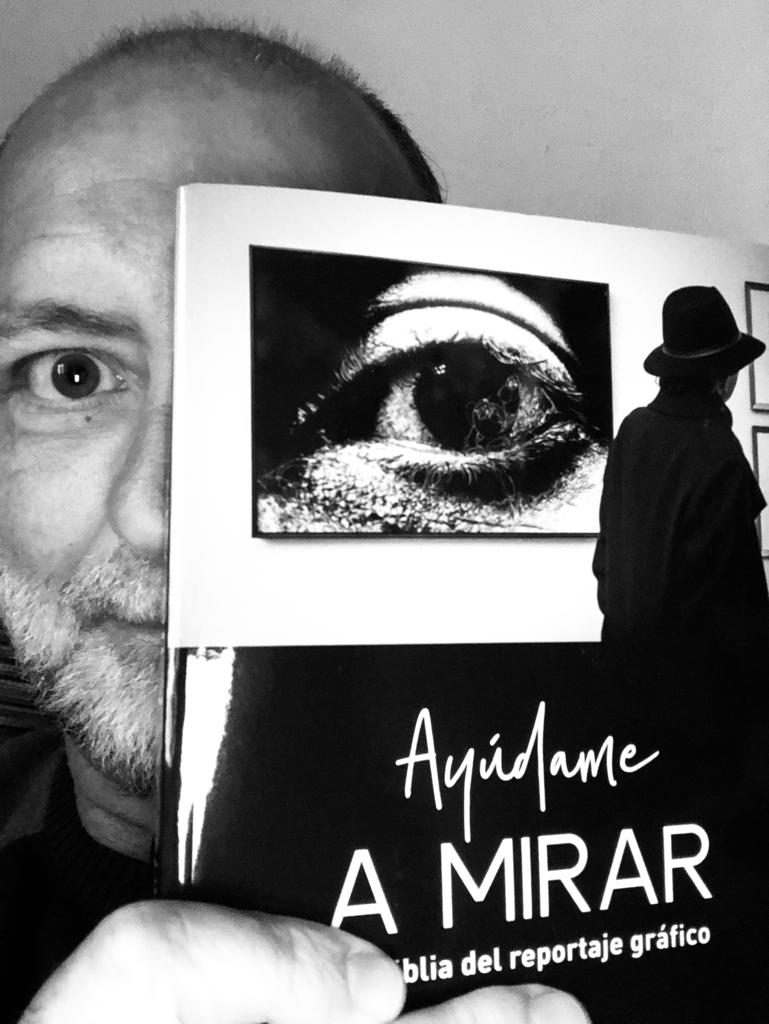

In [ ]:
data

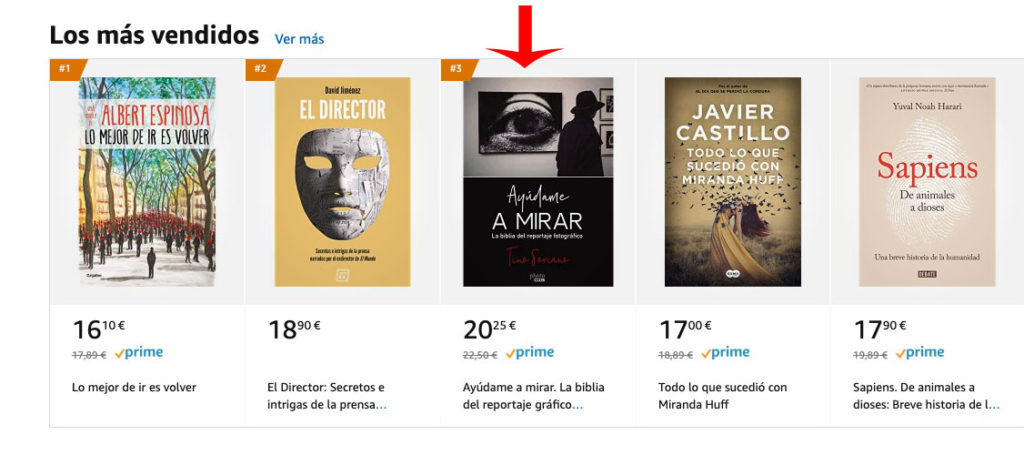

In [ ]:
data = Image.fromarray(collage[0])
data

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt2.xml")
face_count = 0
face_images = []
for img in images:
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor = 1.2,
        minNeighbors = 8,
        minSize = (30, 30)
  )
  for (x, y, w, h) in faces:
    face_img = img[y:y+h, x:x+w]
    face_images.append(face_img)

In [ ]:
faces_list = face_images

- Crear el conjunto de imagenes

In [ ]:
import math
import random

def create_collage(faces_list,size=(200,200)):
  faces_per_row = math.ceil(math.sqrt(len(faces_list)))
  while len(faces_list)%faces_per_row != 0:
    faces_list.append(random.choice(faces_list))
  counter = 1
  matrix = None
  nueva_fila = True
  for img in faces_list:
    img = np.asarray(Image.fromarray(img).resize(size))
    if nueva_fila:
      fila = img
      nueva_fila = False
    else:
      fila = np.hstack([fila, img])
    if counter == faces_per_row:
      matrix = fila
      nueva_fila = True
    elif counter % faces_per_row == 0:
      matrix = np.vstack([matrix, fila])
      nueva_fila = True
    counter += 1
  return Image.fromarray(matrix)

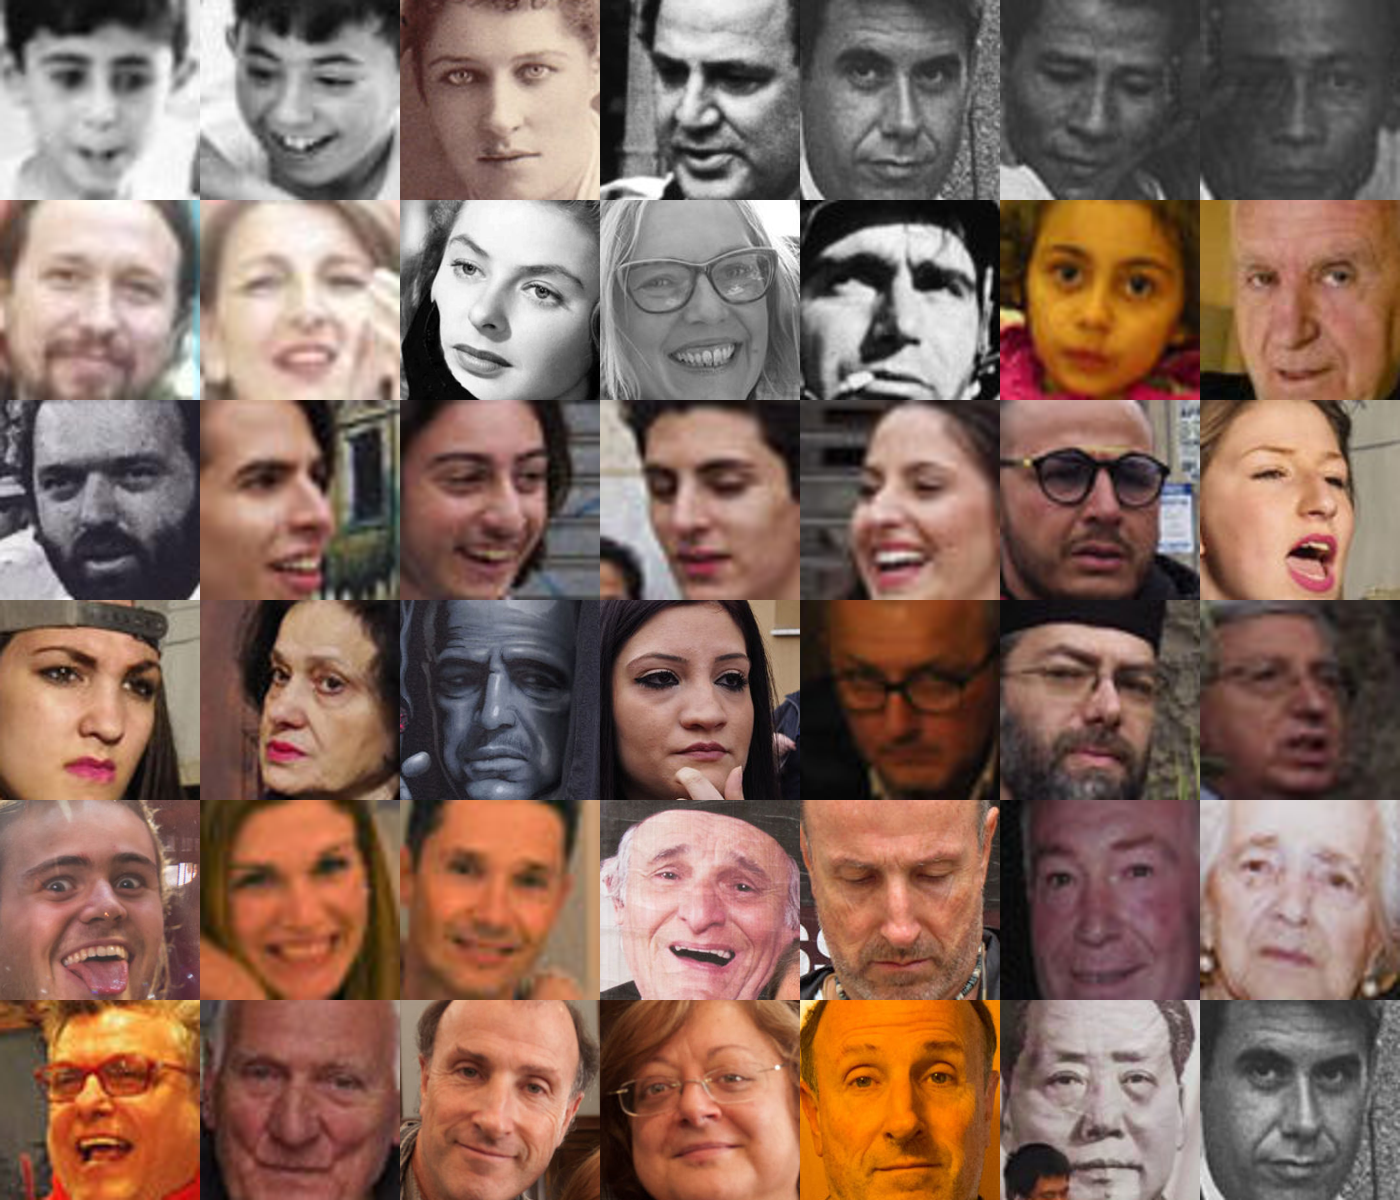

In [ ]:
create_collage(face_images)